In [2]:
import os
import sys
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
#Start with preprocessing/cleaning of data

#Correct columns of rain data

BEC_rain_daily = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\BECrain.txt")
file = open("C:\\Users\\Tyler\\ProjectData\\BECrain.txt")
newFile = open("C:\\Users\\Tyler\\ProjectData\\BECrainDailyFixed.txt", 'w')
for line in file:
    newFile.write(line[0:10] + "," + line[10:12] + "," + line[12:14] + line[14:134]+"\n" )
    
newFile.close()


In [109]:
FMC_rain_daily = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\FMCrain.txt")
file = open("C:\\Users\\Tyler\\ProjectData\\FMCrain.txt")
newFile = open("C:\\Users\\Tyler\\ProjectData\\FMCrainDailyFixed.txt", 'w')
for line in file:
    newFile.write(line[0:10] + "," + line[10:12] + "," + line[12:14] + line[14:134]+"\n" )
    
newFile.close()

In [4]:
#Remove missing data entries
BEC_rain_daily = open("C:\\Users\\Tyler\\ProjectData\\BECrainDailyFixed.txt")

newFile = open("C:\\Users\\Tyler\\ProjectData\\BECrainDailyFixedNoMissing.txt", 'w')
for line in BEC_rain_daily:
    if line.find('m') == -1:
        newFile.write(line)
    
newFile.close()

In [110]:
FMC_rain_daily = open("C:\\Users\\Tyler\\ProjectData\\FMCrainDailyFixed.txt")

newFile = open("C:\\Users\\Tyler\\ProjectData\\FMCrainDailyFixedNoMissing.txt", 'w')
for line in FMC_rain_daily:
    if line.find('m') == -1:
        newFile.write(line)
    
newFile.close()

In [33]:
#Convert format of Rain Data from daily into monthly
def dailyToMonthlyRain(fileName):
    file = pd.read_csv(fileName)
    newFile=open(fileName[:-4]+"Monthly.txt", 'w')
    monthRain=""
    #data is from 2006 to 2017, hardcode that query
    for i in range (2006, 2018):
        for j in range(1,13):
            q = "year == " + str(i) + " and month == " + str(j)
            r = file.query(q)
            r=r.sort_values('day', ascending=False)
            if (r.empty==False):
                monthRain=float(r.iloc[0].start)-float(r.iloc[-1].start)
            #print(pd.to_numeric(BEC_rain_daily[(BEC_rain_daily.year == i) & (BEC_rain_daily.month == j) & (BEC_rain_daily.day == 28)].start))
            #end = BEC_rain_daily[(BEC_rain_daily.year == i) & (BEC_rain_daily.month == j) & (BEC_rain_daily.day == 1)].start.astype('float')
            #monthRain = BEC_rain_daily[(BEC_rain_daily.year == i) & (BEC_rain_daily.month == j) & (BEC_rain_daily.day == 28)].start - BEC_rain_daily[(BEC_rain_daily.year == i) & (BEC_rain_daily.month == j) & (BEC_rain_daily.day ==1)].start
                if monthRain >0:
                    newFile.write(str(i) + "," + str(j) + "," + str(round(monthRain,2)))
                    newFile.write('\n')
    newFile.close()
    return
dailyToMonthlyRain("C:\\Users\\Tyler\\ProjectData\\BECrainDailyFixedNoMissing.txt")
dailyToMonthlyRain("C:\\Users\\Tyler\\ProjectData\\FMCrainDailyFixedNoMissing.txt")

In [4]:
#method to correct columns of non-rain data
def fixData(fileName):
    file = open(fileName)
    newFile=open(fileName[:-4]+"Fixed.txt", 'w')
    for line in file:
    #newFile.write(line[0:10])
        newFile.write(line[0:4] + "," + line[4:6] + "," + line[6:8] + line[8:len(line)] )

    newFile.close()
    file.close()
    return

In [34]:
fixData("C:\\Users\\Tyler\\ProjectData\\BECmax.txt")
fixData("C:\\Users\\Tyler\\ProjectData\\BECaverage.txt")
fixData("C:\\Users\\Tyler\\ProjectData\\BECmin.txt")
fixData("C:\\Users\\Tyler\\ProjectData\\FMCmax.txt")
fixData("C:\\Users\\Tyler\\ProjectData\\FMCaverage.txt")
fixData("C:\\Users\\Tyler\\ProjectData\\FMCmin.txt")

In [89]:
#Method to remove missing data
def removeMissing(fileName):
    file = open(fileName)
    newFile=open(fileName[:-4]+"NoMissing.txt", 'w')
    for line in file:
        if line.find('m') == -1:
            newFile.write(line)
    
    newFile.close()
    file.close()
    return

In [117]:
#Read in files
BEC_average_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECaverageFixed.txt")
BEC_min_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECminFixed.txt")
BEC_max_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECmaxFixed.txt")
BEC_rain=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECrainDailyFixedNoMissingMonthly.txt")

#Collect data
BEC_data = BEC_average_temp
BEC_data = pd.merge(BEC_data, BEC_min_temp, on= ["Day", 'Month', 'Year'])
BEC_data = pd.merge(BEC_data, BEC_max_temp, on= ["Day", 'Month', 'Year'])
BEC_data = pd.merge(BEC_data, BEC_rain, on= ['Month', 'Year'])
BEC_data.head()
BEC_data.to_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECData.txt")
BEC_data.head()

#Read in files
FMC_min_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCminFixed.txt")
FMC_max_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCmaxFixed.txt")
FMC_average_temp = pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCaverageFixed.txt")
FMC_rain=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCrainDailyFixedNoMissingMonthly.txt")

#Collect data
FMC_data = FMC_average_temp
FMC_data = pd.merge(FMC_data, FMC_min_temp, on= ["Day", 'Month', 'Year'])
FMC_data = pd.merge(FMC_data, FMC_max_temp, on= ["Day", 'Month', 'Year'])
FMC_data = pd.merge(FMC_data, FMC_rain, on= ['Month', 'Year'])
FMC_data.head()
FMC_data.to_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCData.txt")
FMC_data.head()

,Year,Month,Day,'TEMPERATURE_x,AIR AVERAGE (deg f)','TEMPERATURE_y,AIR MINIMUM (deg f)','TEMPERATURE,AIR MAXIMUM (deg f)',Rain
0,2006,1,1,0,52,0,47,0,60,0.48
1,2006,1,2,0,51,0,48,0,54,0.48
2,2006,1,3,0,51,0,45,0,62,0.48
3,2006,1,4,0,66,0,53,0,81,0.48
4,2006,1,5,0,71,0,65,0,78,0.48


In [55]:
BEC_data = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECData.txt")

#for now, chop out missing data
newFile = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt", 'w')
for line in BEC_data:
    if line.find('m'):
        newFile.write(line)
    
newFile.close()
BEC_data.close()

In [118]:
FMC_data = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCData.txt")

#for now, chop out missing data
#newcontents = contents.replace('m','0')
newFile = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCDataNoMissing.txt", 'w')
for line in BEC_data:
    if line.find('m'):
        newFile.write(line)
    
newFile.close()
FMC_data.close()

In [56]:
removeMissing("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECData.txt")

In [121]:
removeMissing("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCData.txt")

In [3]:
#print(BEC_data.drop(columns=['\'TEMPERATURE_x','\'TEMPERATURE','\'TEMPERATURE_y']).query('Day==1').head())

BEC_data = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt")
#contents = BEC_data.read()
#newcontents = contents.replace('m','0')

#newFile = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt", 'w')
#newFile.write(newcontents)
#newFile.close()
#BEC_data.close()

BEC_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt")


rain_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECrainDailyFixedNoMissingMonthly.txt")
newFile=open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECRain.txt", 'w')
newFile.write('rain\n')

for i in range (1,len(rain_data.index)):
    newFile.write(str(rain_data.rain[i])+"\n")
newFile.write("0")
newFile.close()

AttributeError: 'DataFrame' object has no attribute 'rain'

In [122]:

FMC_data = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCDataNoMissing.txt")


FMC_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCDataNoMissing.txt"

rain_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCrainDailyFixedNoMissingMonthly.txt")
newFile=open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCRain.txt", 'w')
newFile.write('rain\n')

for i in range (1,len(rain_data.index)):
    newFile.write(str(rain_data.rain[i])+"\n")
newFile.write("0")
newFile.close()

AttributeError: 'DataFrame' object has no attribute 'rain'

In [4]:
BEC_data = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt")
contents = BEC_data.read()
newcontents = contents.replace('m','0')

newFile = open("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt", 'w')
newFile.write(newcontents)
newFile.close()
BEC_data.close()

In [3]:
#Start working with data

#Collect data from all sources
BEC_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\BECDataNoMissing.txt")
BEC_data=BEC_data.query('Day==1').drop(['Day', '\'TEMPERATURE_x','\'TEMPERATURE_y','\'TEMPERATURE','A'],axis=1)
BEC_data.head()

,Year,Month,AIR AVERAGE (deg f),AIR MINIMUM (deg f),AIR MAXIMUM (deg f),rain
0,2006,1,55,49,61,0.94
31,2006,2,55,48,68,0.36
59,2006,5,56,54,59,0.03
83,2006,7,79,64,100,0.02
114,2006,8,71,65,79,0.03


In [4]:
FMC_data=pd.read_csv("C:\\Users\\Tyler\\ProjectData\\CleanedData\\FMCDataNoMissing.txt")
FMC_data=FMC_data.query('Day==1').drop(['Day', '\'TEMPERATURE_x','\'TEMPERATURE_y','\'TEMPERATURE','A'],axis=1)
FMC_data.head()

,Year,Month,AIR AVERAGE (deg f),AIR MINIMUM (deg f),AIR MAXIMUM (deg f),rain
0,2006,1,52,47,60,0.48
31,2006,3,52,45,62,0.46
62,2006,4,49,44,59,1.31
92,2006,6,74,61,87,0.05
122,2006,7,87,70,102,0.07


In [5]:

print(pd.concat([BEC_data,FMC_data]))

data=pd.concat([BEC_data,FMC_data])

      Year  Month   AIR AVERAGE (deg f)   AIR MINIMUM (deg f)  \
0     2006      1                    55                    49   
31    2006      2                    55                    48   
59    2006      5                    56                    54   
83    2006      7                    79                    64   
114   2006      8                    71                    65   
145   2006     11                    61                    53   
175   2006     12                    61                    50   
206   2007      1                    58                    45   
237   2007      2                    50                    44   
265   2007      3                    48                    38   
296   2007      4                    59                    42   
326   2007      9                    86                    70   
338   2007     10                    69                    57   
354   2007     12                    50                    43   
385   2008      1        

In [38]:
#Create X and Y

X = data.drop(columns=['rain'])
y=data.dropna(axis=1)["rain"]
X.head()



Index(['Year', 'Month', ' AIR AVERAGE (deg f)', ' AIR MINIMUM (deg f)',
       ' AIR MAXIMUM (deg f)', 'rain'],
      dtype='object')
['Year', 'Month', ' AIR AVERAGE (deg f)', ' AIR MINIMUM (deg f)', ' AIR MAXIMUM (deg f)', 'rain']


['Year,Month, AIR AVERAGE (deg f), AIR MINIMUM (deg f), AIR MAXIMUM (deg f)']

In [7]:
y.head()
print(np.asarray(y))


[0.94 0.36 0.03 0.02 0.03 0.07 0.73 0.44 1.53 0.29 0.8  0.32 0.22 1.29
 4.59 2.15 0.06 0.04 0.6  0.01 1.63 0.18 3.8  0.07 0.08 0.03 0.02 0.22
 0.13 5.86 3.76 0.18 1.29 0.04 0.02 0.03 0.01 0.03 3.38 1.49 0.74 2.98
 2.53 0.34 0.52 0.08 0.01 0.01 0.2  1.12 2.03 0.25 1.05 1.17 2.16 1.33
 0.19 0.4  0.02 0.33 0.44 2.38 1.07 0.8  0.91 0.05 0.34 0.02 0.02 0.01
 0.71 0.44 0.02 0.36 0.65 0.26 0.05 0.14 0.17 0.02 0.26 4.39 0.88 0.99
 0.36 0.07 0.71 0.02 0.72 0.03 0.91 0.64 0.53 1.5  2.79 0.27 1.28 0.29
 0.16 0.03 0.03 0.3  1.42 5.35 9.07 3.78 0.15 0.01 1.05 0.09 0.04 0.13
 0.06 0.48 0.46 1.31 0.05 0.07 0.87 0.05 0.83 0.15 0.55 0.02 0.26 0.44
 0.62 3.74 1.3  0.01 0.03 0.29 1.74 0.22 3.26 0.28 0.03 0.09 0.04 0.42
 0.05 5.46 3.51 0.73 1.44 0.06 0.01 0.03 0.01 0.07 1.7  1.25 0.75 2.25
 2.41 0.12 0.61 0.1  0.02 0.12 0.81 1.55 0.46 1.05 0.42 1.83 1.27 0.24
 0.03 0.08 0.02 1.12 0.73 2.32 1.61 0.72 0.62 0.06 0.45 0.03 0.04 0.01
 0.52 0.36 0.04 0.45 1.03 0.62 0.04 0.03 0.5  4.38 1.17 0.52 0.29 0.61
 0.73 

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Start off with linear regression

n_folds = 5
kf = KFold(n_folds)  # 5 fold classification... just because.



X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(y), test_size=0.2)
from sklearn.linear_model import LinearRegression
model=LinearRegression()

print(cross_val_score(model, X, y, cv=kf))
print(model)

[-0.05246223 -0.28076605  0.0419232   0.06498776  0.11652662]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


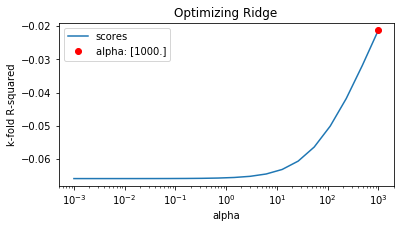

In [53]:
#Ridge method from homework exercise

# use k-fold validation on each value of alpha to determine the mean R^2.
ridge_scores = []

for alpha in alphas:
    # initialize a ridge object below with the current alpha
    this_alpha_scores = []
    for train, validate in kf.split(X_train):
        
### YOUR CODE HERE ###
        ridge = lm.Ridge(alpha=alpha)
        ridge.fit(X_train[train], y_train[train])
        # fit the ridge object on the training set and score on the validation set 
        scores = ridge.score(X_train[validate], y_train[validate])
######################    
    
        this_alpha_scores.append(scores)
    ridge_scores.append(this_alpha_scores)
    
ridge_scores = np.vstack(ridge_scores)

ridge_bestalpha = alphas[ridge_scores.mean(1) == ridge_scores.mean(1).max()]  # the best alpha is the one the produces the highest score

# plot the mean score against alpha candidates
plt.figure(figsize=(6, 3))
plt.plot(alphas, ridge_scores.mean(1), label='scores')
plt.plot(ridge_bestalpha, ridge_scores.mean(1).max(), 'ro', label='alpha: ' + str(ridge_bestalpha))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('k-fold R-squared')
plt.title('Optimizing Ridge')
plt.legend()
plt.show()

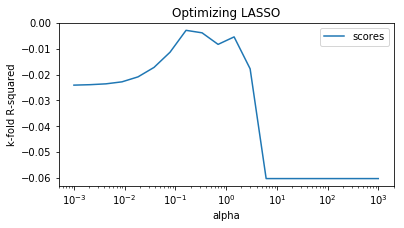

In [51]:
#Lasso method from homework exercise

alphas = np.logspace(-3, 3, 20)
# use k-fold validation on each value of alpha to determine the mean R^2.
lasso_scores = []

for alpha in alphas:
    this_alpha_scores = []

### YOUR CODE HERE ###
    # loop through folds
    for train, validate in kf.split(X_train):
        
        # initialize a ridge object below with the current alpha
        lasso = lm.Lasso(alpha=alpha)
        # fit the lasso object on the training set and score on the validation set 
        lasso.fit(X_train[train], y_train[train])
        scores = lasso.score(X_train[validate], y_train[validate])
######################    
    
        this_alpha_scores.append(scores)
    lasso_scores.append(this_alpha_scores)
    
######################
lasso_scores = np.vstack(lasso_scores)

lasso_bestalpha = alphas[lasso_scores.mean(1) == lasso_scores.mean(1).max()]  # the best alpha is the one the produces the highest score

# plot the mean score against alpha candidates
plt.figure(figsize=(6, 3))
plt.plot(alphas, lasso_scores.mean(1), label='scores')

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('k-fold R-squared')
plt.title('Optimizing LASSO')
plt.legend()
plt.show()

In [242]:
#Random Forest regression from homework

max_depth=10  # a nested for loop can be run to optimize this too

candidate_trees = np.arange(1, 100)
scores = []
for n_trees in candidate_trees:
    # we specify the max depth of each tree, as well as set the number of trees in our random forest
    clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_trees)
    scores.append(cross_val_score(clf, X, y, cv=kf))

scores = np.array(scores)
tree_scores = scores.mean(axis=1)


0.6699580798026844
[ 0.33039709 -0.03069537  0.60033329  0.52536368  0.78778994]
Accuracy: 0.44 (+/- 0.12)


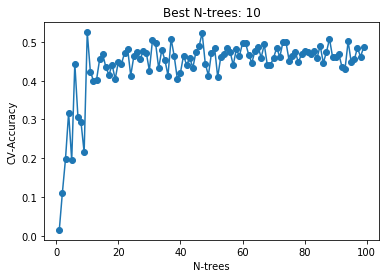

In [246]:
plt.plot(candidate_trees, tree_scores, 'o-')
plt.ylabel("CV-Accuracy")
plt.xlabel("N-trees")
best_k = candidate_trees[np.argmax(tree_scores)]
plt.title("Best N-trees: {}".format(best_k))

clf = RandomForestRegressor(max_depth=max_depth, n_estimators=best_k)
print(max(cross_val_score(clf, X, y, cv=kf)))
print(cross_val_score(clf, X, y, cv=kf))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

0.7264841666890816


In [140]:
#Create neural network

layer_sizes = [X_train.shape[1], 10, np.unique(y_train).shape[0]]  # 1 hidden layers of size 10 and 5, respectively
print(layer_sizes)


[5, 10, 91]


In [95]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(4, input_dim=5,kernel_initializer='normal', activation='relu'))
    #model.add(Dense(2,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')  
    return model

In [96]:
model = build_model()


177


In [97]:
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose = 0)

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(X_test))

1.2561562576103769

In [99]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, model.predict(X_test))
print(score)
print(y_test)
print(model.predict(X_test))

0.9171957885954114
[0.25 0.03 1.28 0.02 1.55 0.29 3.51 0.03 0.47 1.17 0.46 2.15 0.02 1.5
 0.01 0.05 1.29 0.27 0.09 0.09 0.8  0.91 2.03 0.62 0.03 0.44 0.01 0.13
 5.35 0.03 1.83 2.41 0.04 0.75 0.04 0.04 0.22 0.05 0.01 0.13 0.81 0.03
 0.07 0.53 0.02]
[[1.3171117 ]
 [1.0173527 ]
 [1.0757642 ]
 [0.7339436 ]
 [0.94692814]
 [1.2170871 ]
 [1.4956135 ]
 [0.89141715]
 [0.7554792 ]
 [1.4450138 ]
 [1.2793471 ]
 [1.6714907 ]
 [0.8401457 ]
 [1.1242894 ]
 [1.2283698 ]
 [1.5398078 ]
 [1.5064878 ]
 [1.6632411 ]
 [1.1129863 ]
 [1.2274826 ]
 [1.2368952 ]
 [0.9984369 ]
 [1.1294457 ]
 [1.423962  ]
 [0.9289627 ]
 [1.0884222 ]
 [1.6619806 ]
 [1.190629  ]
 [1.1919158 ]
 [1.0608064 ]
 [1.5943124 ]
 [1.494983  ]
 [1.485394  ]
 [1.698932  ]
 [1.1637948 ]
 [1.3015872 ]
 [0.6719153 ]
 [0.8587254 ]
 [0.9502517 ]
 [1.0265088 ]
 [0.5480242 ]
 [0.79917705]
 [1.2476306 ]
 [0.77030873]
 [1.2269831 ]]


In [100]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(r2)

-0.13219998414610368


Dataset: I was examining weather data in California in order to predict rainfall.  My features were month, year, (monthly) temperature average,(monthly) temperature max, and (monthly) temperature min, and my dependent variable was monthly rain in inches.  This data was gathered from the California Department of Water Resources, and was centered in Orange County.  I didn't want to look at too large an area, as I was unsure if climate would be consistant enough across larger distances to be workable.  This, obviously, is a regression problem.

Project Expectations:
I encountered several difficulties with the data.
1: I expected outliers, and, unfortunately, I cannot just drop those outliers, as they are representative of the data.  Fluctuating rain levels and drought are common in California, so, even though I have data points saying there are 0 inches of rain in January one year, and 9 inches in another, and both of those data points are valid and useful.

Additionally, another issue with the data is the time frame I was able to look at.  The only weather stations I could find with all the features I wanted to examine didn't have much of that data.  There were roughly 10 years, which is only 120 data points.  Even stringing together a few weather stations as I did didn't provide much data.  Aside from being a low number of data points, this carries a domain specific issue as well.  Rain, and climate in general, is roughly cyclical.  The issue is, however, that this cycle is often very rough (thus hard to capture), and can take place on a very long timescale (years, if not tens of years).  My concern is that I do not have enough data going far back enough to capture these trends, reducing the usefulness of my model.

2: Data representation.  The data I found was recorded in a very odd way, with differing timescales.  Temperature data was recorded daily, and percipitation data was recorded hourly.  Even worse, the rain data metric appeared to be "cumulative rainfall this year up to this hour"... most of the time.  Several times in the data, this measure arbitrarily reset to 0, and not at a predictable time like January 1st.  Additionally, there were missing patches of data, though nothing too extreme.  Thus, some data points had to be dropped.

Models used:
Random Forest Regression: I chose Random Forest as, intuivitely, I felt that decision trees could model this problem well.  It holds up to casual examination that you could estimate rainfall based on a series of decisions (is it a summer month?  Is the low temeprature below X value?  ect).  And this model performed very reasonably.  After using cross validation in order to find the best number of trees, I got a cross validation training score that maxed out at ~70%, and had an average accuracy of ~.40, +/- .10

I attribute the variability in the cross validation scores to the uneven nature of the data, as well as the nature of tree-based models.  There are both months that almost never have any rain (the summer months) and large, natural outliers in the data (droughts/floods) that, coupled with the relatively low number of data points, could create odd test/training splits.

Linear Regression: My inital thought was that linear regression would be half decent, as it seems like there could be some reasonably simple trends in my data (i.e., certain months very predictably have higher/lower rainfall, the lower the temperature is, the more rain there will be ect).

However, the method proved very lacking.  The model generated by logistic regression was very poor, and wasn't improved by either the Ridge or LASSO methods.  At best, this method only produced a regression with ~10% accuracy, a pretty sizeable failure.

Neural Network: Despite my best efforts, I was not able to construct an accurate neural network.  No matter how I structured or trained the network (changing the number of hidden layers, batch size, ect.) the network always seemed to prefer very middle of the road guesses (hovering around 1 inch of rain, give or take a few fractions of an inch).

I used mean square error, r2 value, and mean absolute error in order to evaluate the network, and no metric were not great.  The error values hovered around 1 inch each (absolute a little lower than one inch, mean squared a little above), and the r2 value told me, more or less, that my network was not accuractly predicting anything, with the value being close to zero. 

Ending Thoughts: 
Overall, I didn't find much success.  My random forest model was the best, but the other two were rather poor.  One of the biggest changes I'd like to make to this problem is to find a larger dataset that covers more time.  My dataset, overall, was small, and this was compounded by the fact that climate operates on a very large timescale.
